# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_test_raw, y_test_raw = test['features'], test['labels']

In [2]:
# load the text labels for the traffic signs
import csv
signnames = {}
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        signnames[int(row['ClassId'])] = row['SignName']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
# get number of training samples
n_train = X_train_raw.shape[0]

# get number of testing examples.
n_test = X_test_raw.shape[0]

#get shape of traffic sign image?
image_shape = (X_train_raw.shape[1],X_train_raw.shape[2])
image_shape = (X_train_raw.shape[1:])

# get number of classes (assuming that training set contains all the labels)
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
# define some functions for visualization and plotting of the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import collections
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# function for plotting relative frequency of the classes
def plot_relative_frequency_of_classes(label_data,n_classes, title):
    
    label_count = collections.Counter(label_data)
    labels, values = zip(*label_count.items())
    indexes = np.arange(len(labels))

    plt.bar(indexes, values, alpha=0.75)
    plt.axis([0, 43, 0, np.max(values)+10])
    
    plt.xlabel('Sign Class')
    plt.ylabel('No. Traffic Signs')
    plt.title(title)

    plt.show()
    
# function for plotting a random subset of images 
def plot_random_image_sample(data,label,numrows,numcols):  

    sample_size = numrows*numcols

    # get permutation
    perm = np.arange(data.shape[0])
    np.random.shuffle(perm)

    sample_set = perm[:sample_size]
    print('Plotting training images with number {}'.format(','.join(map(str, sample_set))))

    plot_images(
        images=data[perm[:sample_size]], 
        labels=label[perm[:sample_size]], 
        rows=numrows, columns=numcols)

def plot_images(images, labels, rows=5, columns=5, predicted_label=None, cmap=None):
    
    fig, axes = plt.subplots(rows, columns,figsize=(20, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        if i >= len(images):
            break
        # Plot image.
        # workaround for single channel grayscale images
        if images[i].shape[2]==1:
            ax.imshow(np.concatenate((images[i],images[i],images[i]), axis=2),cmap = 'gray')
        else:
             ax.imshow(images[i], cmap=cmap)
        
        # Show true and predicted classes.
        if predicted_label is None:
            xlabel = "True: {0}".format(labels[i])
        else:
            xlabel = "T: {0}, P: {1}".format(labels[i], predicted_label[i])

        # Show the classes on the x-axis.
        ax.set_xlabel(xlabel)
        # in addition add text label
        ax.text(0,-2, signnames[labels[i]])

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    
def plot_images_simple(images,labels):
    plt.figure(figsize=(15, 15))
    for i in range(0,images.shape[0]):
        plt.subplot(8, 8, i+1) 
        plt.axis('off')
        #plt.xlabel("True: {0}".format(labels[1]))
        plt.imshow(images[i])
    plt.show()
    

### Visualization
Do some visualization of the dataset. First plot the relative frequencies of the classes in the training and test set.

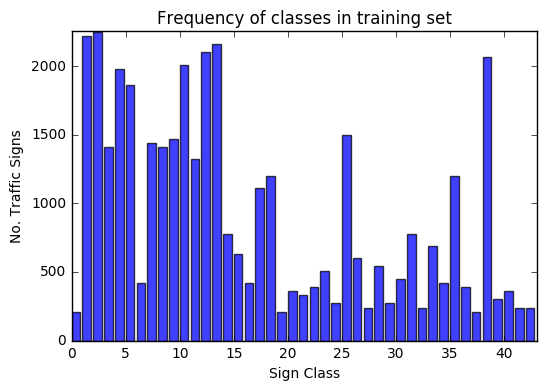

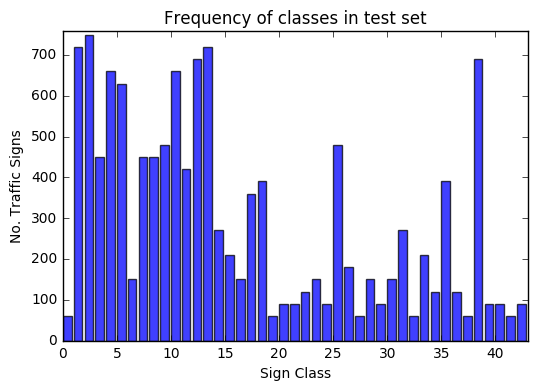

In [5]:
plot_relative_frequency_of_classes(y_train_raw,n_classes, title='Frequency of classes in training set')
plot_relative_frequency_of_classes(y_test_raw,n_classes, title='Frequency of classes in test set')


Next, plot a small random sample of the images to get a feeling what the data looks like.

Plotting training images with number 16615,33153,5402,14289,1766,34340,23614,27495,14058,37921,39030,21442,24073,27069,7669,8804,30219,6208,3480,22043,3823,3575,18243,14147


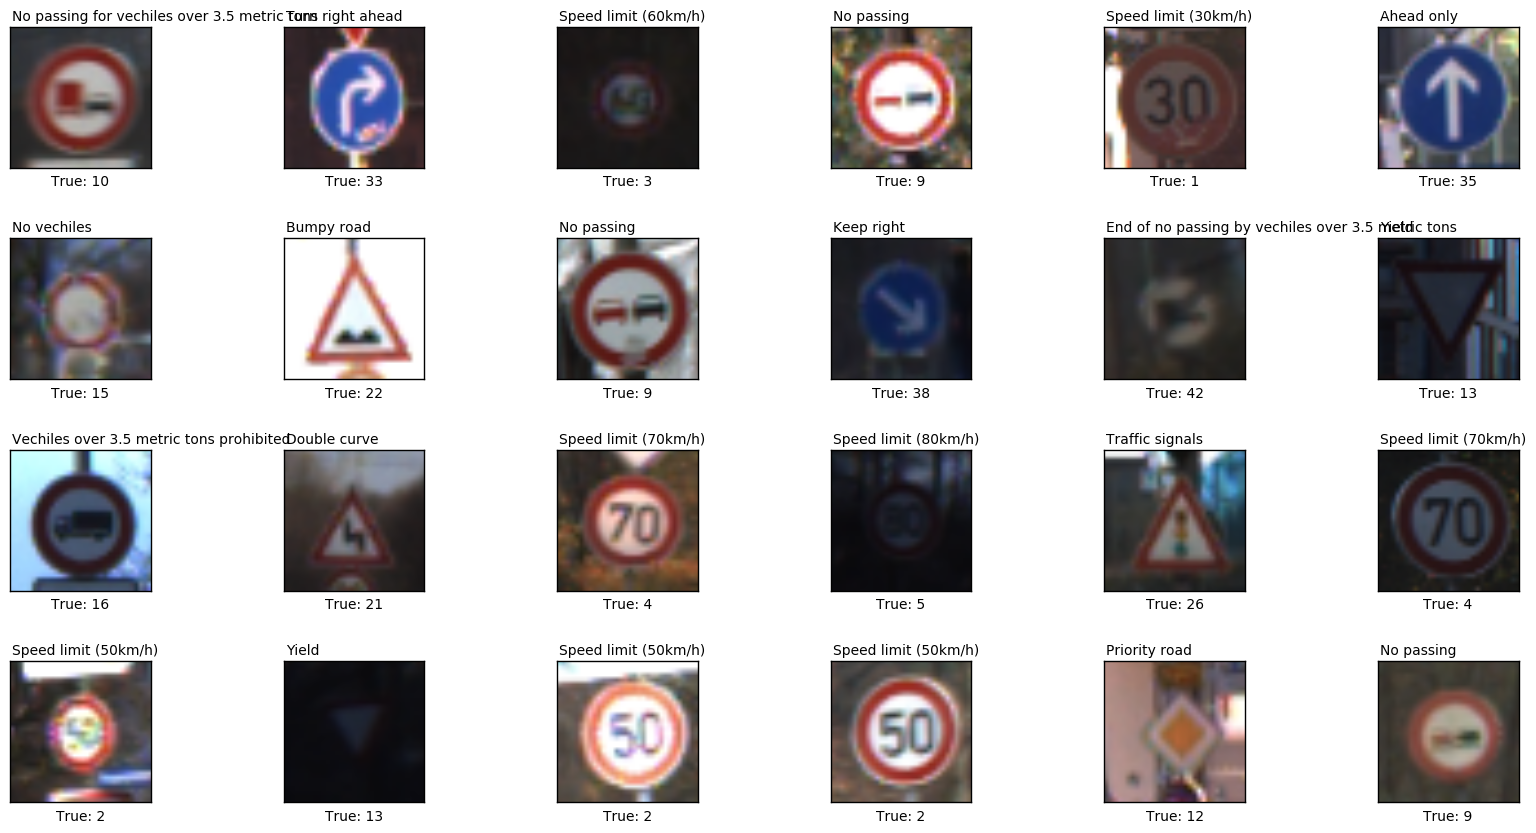

In [6]:
plot_random_image_sample(X_train_raw, y_train_raw,4,6)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
# define functions for preprocessing the data

def normalize_image(img):
    img = img / 255.0 
    return img
    
def equalize_image(img):
    for i in range(0,3):
        channel = img[:,:,i]
        channel = channel.astype(np.uint8)
        channel = cv2.equalizeHist(channel)
        img[:,:,i] = channel    
    return img
        
def grayscale_image(img):
    new_array = []
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

# preprocessing without grayscaling 
def preprocess_all_images_v1(images):
    result = []
    for i in range(0,images.shape[0]):
        img = np.array(images[i,:,:,:])
        img = equalize_image(img)
        img = normalize_image(img)
        result.append(img)
    
    return np.array(result)

# preprocessing with grayscaling 
def preprocess_all_images_v2(images):
    result = []
    for i in range(0,images.shape[0]):
        img = np.array(images[i,:,:,:])
        img = equalize_image(img)
        #img = grayscale_image(img)
        img = normalize_image(img)
        result.append(img)
    result = np.array(result).reshape((-1,32,32,3))
    return np.array(result)

# split all training data into train and validation set 
def split_data(x, y):
    data_train, data_valid, labels_train, labels_valid = train_test_split(x, y, test_size=0.20, random_state=42)
    print("Shape of training examples = ", data_train.shape)
    print("Shape of validation examples = ", data_valid.shape)
    return data_train, data_valid, labels_train, labels_valid



### Preprocess the images

In [8]:
X_train_all = preprocess_all_images_v2(X_train_raw)
X_test = preprocess_all_images_v2(X_test_raw)
# split training samples into training and validation set
X_train, X_validation, y_train, y_validation = split_data(X_train_all, y_train_raw)

Shape of training examples =  (31367, 32, 32, 3)
Shape of validation examples =  (7842, 32, 32, 3)


### Plot preprocessed images
See what preprocessing does to the images

Plotting training images with number 6425,12465,10848,20852,29331,4658,26372,20025,2658,34522,20455,17453,20991,22950,14882,5326,32662,28239,19526,14118,31892,1035,10885,32446


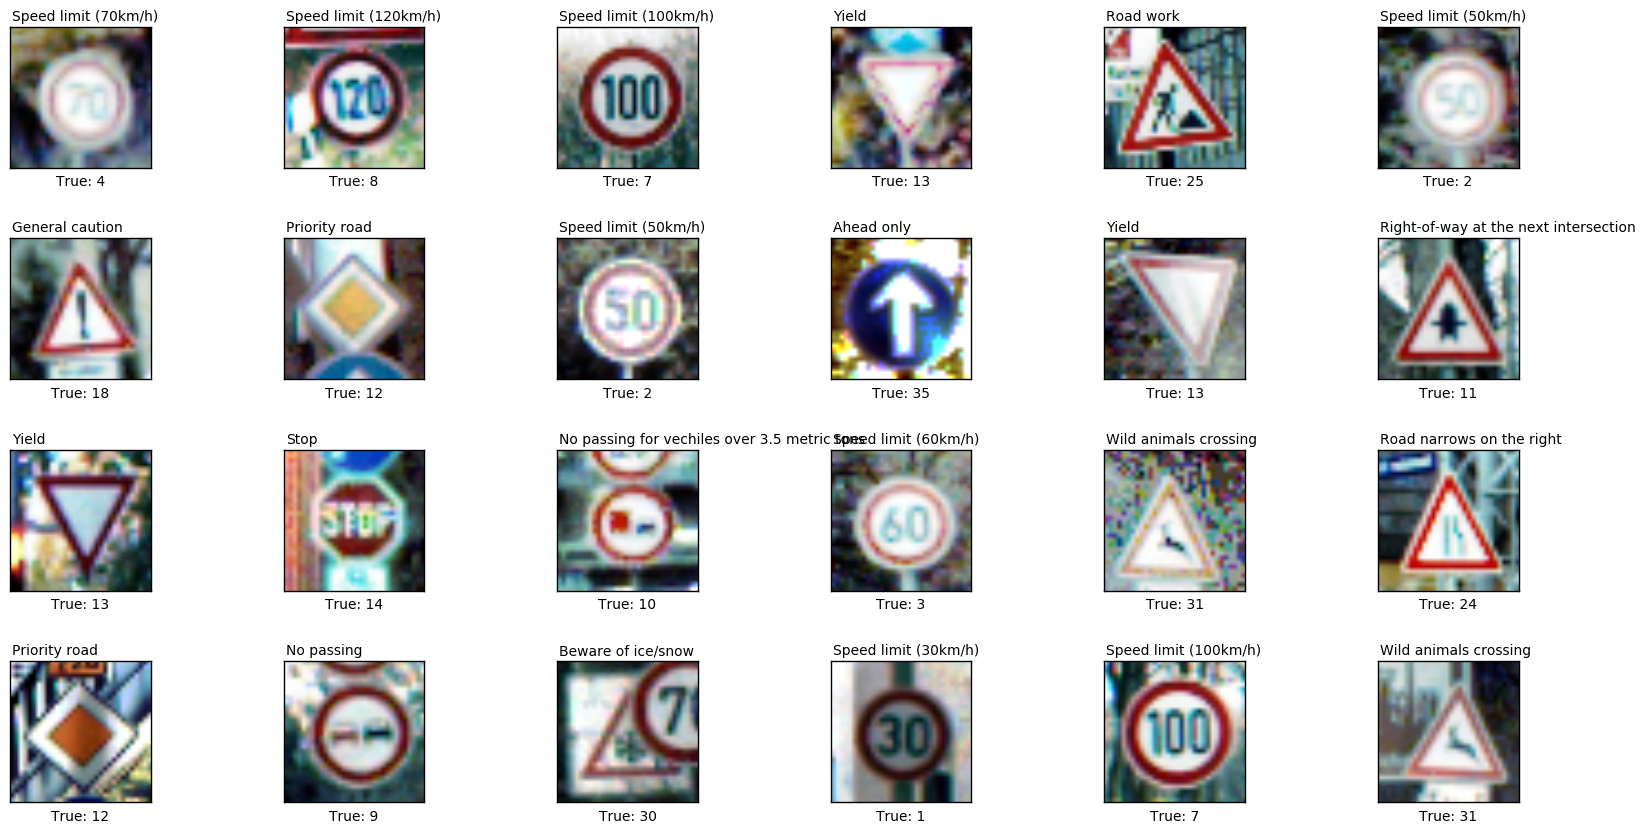

In [9]:
plot_random_image_sample(X_train_all, y_train_raw,4,6)

### Augment the dataset 
Define data augmentation functions

In [10]:
# define data augmentation fucntions

def generate_transformed_image(image):
    
    # set transformation parameters roughly based on LeCuns paper
    max_angle   = 15
    max_translation = 5
    
    max_affine_shear_offset_x = 5
    max_affine_shear_offset_y = 5
    
    min_scale = 0.9
    max_scale = 1.1
    scale_factor = random.uniform(min_scale, max_scale)
    
    rows,cols,ch = image.shape 
    
    # rotation and scale matrix
    rotation_angle = np.random.uniform(max_angle)-max_angle/2
    rotation_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,scale_factor)
    
    # translation
    translation_x = max_translation*np.random.uniform()-max_translation/2
    translation_y = max_translation*np.random.uniform()-max_translation/2
    translation_matrix = np.float32([[1,0,translation_x],[0,1,translation_y]])
    
    # affine shear deformation
    # original point positions
    org_point_pos = np.float32([[6,6],[20,6],[6,20]])
    new_pos_p1_x = 6+max_affine_shear_offset_x*np.random.uniform()-max_affine_shear_offset_x/2
    new_pos_p1_y = 6+max_affine_shear_offset_y*np.random.uniform()-max_affine_shear_offset_y/2
    new_pos_p3_x = 6+max_affine_shear_offset_x*np.random.uniform()-max_affine_shear_offset_x/2
    new_pos_p3_y = 20+max_affine_shear_offset_y*np.random.uniform()-max_affine_shear_offset_y/2
    new_point_pos = np.float32([[new_pos_p1_x,new_pos_p1_y],[20,6],[new_pos_p3_x,new_pos_p3_y]])
    shear_matrix = cv2.getAffineTransform(org_point_pos,new_point_pos)
    
 

    
    # do the transformations step by step (makes it easier to play arounf with different variants)  
    # rotate and scale
    image = cv2.warpAffine(image,rotation_matrix,(cols,rows))
    # translate
    image = cv2.warpAffine(image,translation_matrix,(cols,rows))
    # skew
    image = cv2.warpAffine(image,shear_matrix,(cols,rows))
     
    return image

    
def augment_training_data(train_data,train_labels,augmentation_factor):
    augmented_training_data = []
    augmented_training_labels =[]
    num_channels = train_data.shape[3]
    for i in range(0,augmentation_factor):
        for j in range(0,train_data.shape[0]):
            img = np.array(train_data[j,:,:,:]).reshape((32,32,num_channels))
            img = generate_transformed_image(img)
            augmented_training_data.append(img)
        # augment labels as well
        augmented_training_labels = np.concatenate((augmented_training_labels, train_labels))
        
    return np.array(augmented_training_data).reshape((-1,32,32,num_channels)), augmented_training_labels

Augment the data set and plot results

Plotting training images with number 15943,58614,16441,21387,61771,14562,59538,41301,25061,44980,38719,18734,43360,54404,28802,53390,24459,21987,5935,59346,7526,39841,57124,36924


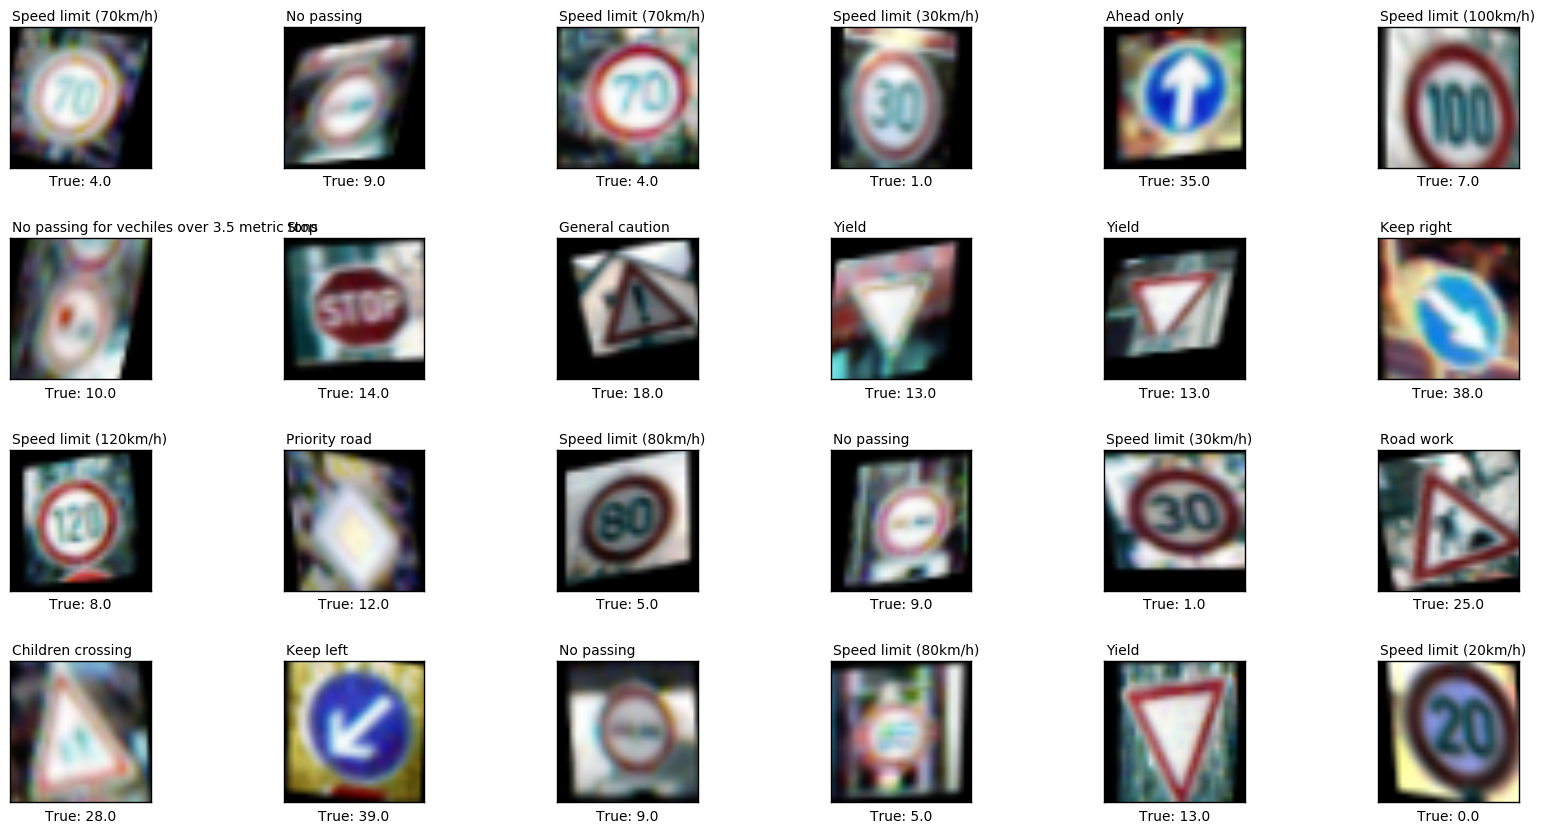

In [11]:
X_train_aug,y_train_aug =augment_training_data(X_train,y_train,2)
plot_random_image_sample(X_train_aug,y_train_aug,4,6)

# do the augmentation 
X_train = np.concatenate((X_train,X_train_aug), axis=0)
#X_train = [X_train.append(X_train_aug)
y_train = np.concatenate((y_train,y_train_aug), axis=0)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The images were processed as follows:
* Histogram equalization to adjusting image intensities in order to enhance contrast and reduced differences in lightning conditions
* Normalized such that pixel values range from 0 to 1 to make things easier for the optimization algorithm



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Again starting from the ideas outlined in [[1]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), I generated additional images using affine transformations of the images in order to generate data that mimics diffrent camera position and and angle. Thereby I hope to enrich the information content in the training and improve test performance of the model. As described in [[1]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), I scaled, rotated, and translated the images using roughly the parameters from [[1]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). In addittion, I skewed the images to create an even richer augmentation. The new, augmented dataset is larger and should improve test performance for two reasons. First, since the training set ist larger, overfitting should be reduced. Second, because the new dataset containes skewed version It should perform better in situation were the picture of to be classified image is not taken directly in front of the sign.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Define some helper functions

In [12]:
def plot_learning_curves(learning_history):
    f, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
    ax[0].plot(learning_history[:,0], label="Training accuracy")
    ax[0].plot(learning_history[:,2], label="Validation accuracy")
    ax[0].legend(loc="lower right")
    ax[1].plot(learning_history[:,1], label="Training loss")
    ax[1].plot(learning_history[:,3], label="Validation loss")
    ax[1].legend()

### Define CNN architecture

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

# Parameters
LEARNING_RATE = 0.001
EPOCHS = 250
BATCH_SIZE = 128
mu = 0
sigma = 0.1
n_classes = 43 

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)
print(EPOCHS)


25


### Define LeNet

In [ ]:
save_model_in_path ="./models/lenet_model"
##### LeNet 
# Store layers weight & bias
weights = {
    # Input = 32x32x1. Output = 28x28x6
    'conv1_W': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    # Layer 2: Convolutional. Output = 10x10x16
    'conv2_W': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    # Fully Connected 1. Input = 400. Output = 120.
    'fc1_W': tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)),
    # Fully Connected 2. Input = 120. Output = 84.
    'fc2_W': tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma)),
     # Layer 5: Fully Connected. Input = 84. Output = 10.
    'fc3_W': tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
}

bias = {
    'conv1_b': tf.Variable(tf.zeros(6)),
    'conv2_b': tf.Variable(tf.zeros(16)),
    'fc1_b': tf.Variable(tf.zeros(120)),
    'fc2_b': tf.Variable(tf.zeros(84)),
    'fc3_b': tf.Variable(tf.zeros(43))
}


def LeNet(x,weights,bias):    

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1   = tf.nn.conv2d(x,weights['conv1_W'], strides=[1, 1, 1, 1], padding='VALID') + bias['conv1_b']
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2   = tf.nn.conv2d(conv1,weights['conv2_W'], strides=[1, 1, 1, 1], padding='VALID') + bias['conv2_b']
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1   = tf.matmul(fc0, weights['fc1_W']) + bias['fc1_b']
    # Activation.
    fc1    = tf.nn.relu(fc1)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2    = tf.matmul(fc1,weights['fc2_W']) + bias['fc2_b']
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.matmul(fc2, weights['fc3_W']) + bias['fc3_b']
    return logits

logits = LeNet(x,weights,bias)





### Define alternative architecture losely based on Yann LeCun paper

In [14]:
##### SerametNet from Lecun2011
import tensorflow as tf
import tensorflow.contrib.layers 

save_model_in_path = "./models/seramnet_model_no_normalization_keep_prob_075_aug_data_25_ep"
total_number_of_variables = 0

def get_var_name():
    global total_number_of_variables
    result = "VAR_{}".format(total_number_of_variables)
    total_number_of_variables+=1
    return result

def reset_variable_number():
    global total_number_of_variables
    total_number_of_variables = 0

def get_shape(m):
    return m.get_shape().as_list()

# define layer types

def conv2d_layer(m, depth, filter_size=1):
    current_shape = get_shape(m)
    filter_shape = [filter_size, filter_size, current_shape[3], depth]
    w = tf.Variable(tf.truncated_normal(filter_shape, mean=0, stddev=sigma),name=get_var_name())
    b = tf.Variable(tf.zeros(depth),name=get_var_name())
    m = tf.nn.conv2d(m, filter=w, strides=[1,1,1,1], padding='SAME') + b
    m = tf.nn.relu(m)
    return m


def maxpool_layer(m):
    current_shape = get_shape(m)
    m = tf.nn.max_pool(m, [1,2,2,1], [1,2,2,1], padding='VALID')
    return m


def flatten_layer(m):
    m = tensorflow.contrib.layers.flatten(m)
    return m


def flatten_and_combine_layer(*args):
    num_parms = 0
    values = []
    for m in args:
        values.append(flatten(m))
    return tf.concat(1, values)
    

def fully_conn_layer(m, output_size):
    current_shape = get_shape(m)
    assert len(current_shape) == 2
    w_shape = [int(current_shape[1]),output_size]
    w = tf.Variable(tf.truncated_normal(w_shape, mean=0, stddev=sigma),name=get_var_name())
    b = tf.Variable(tf.zeros(output_size),name=get_var_name())
    m = tf.add(tf.matmul(m, w), b)
    return m


def relu_layer(m):
    return tf.nn.relu(m)

def dropout_layer(m, keep_prob):
    return tf.nn.dropout(m, keep_prob)
        
def SeraNet(x):
    reset_variable_number()
    m1 = conv2d_layer(x, 3, 1)
    m1 = conv2d_layer(m1, 108, 5)
    m1 = maxpool_layer(m1)
    m2 = conv2d_layer(m1, 200, 5)
    m2 = maxpool_layer(m2)
    m = flatten_and_combine_layer(m1,m2)
    m = fully_conn_layer(m, 400)
    m = relu_layer(m)
    m=  dropout_layer(m, keep_prob)
    m = fully_conn_layer(m, 400)
    m = relu_layer(m)
    m = dropout_layer(m, keep_prob)
    logits = fully_conn_layer(m, n_classes)
    return logits

logits = SeraNet(x)

In [15]:

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run((accuracy_operation,loss_operation), feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples,  total_loss / num_examples

Training...

EPOCH   Training Accuracy   Training Loss      Val. Accuracy       Val. Loss
  1     0.456648            1.791151           0.873884            0.407450       
  2     0.789482            0.631621           0.968630            0.100082       
  3     0.887026            0.339683           0.984188            0.047705       
  4     0.926345            0.221470           0.987121            0.042313       
  5     0.944336            0.167659           0.994262            0.016986       
  6     0.954698            0.136074           0.994517            0.016513       
  7     0.962232            0.113493           0.996047            0.013911       
  8     0.967992            0.097926           0.997067            0.010696       
  9     0.972721            0.084734           0.994517            0.020030       
 10     0.974060            0.077840           0.996812            0.009716       
 11     0.977078            0.072677           0.996302            0.011022     

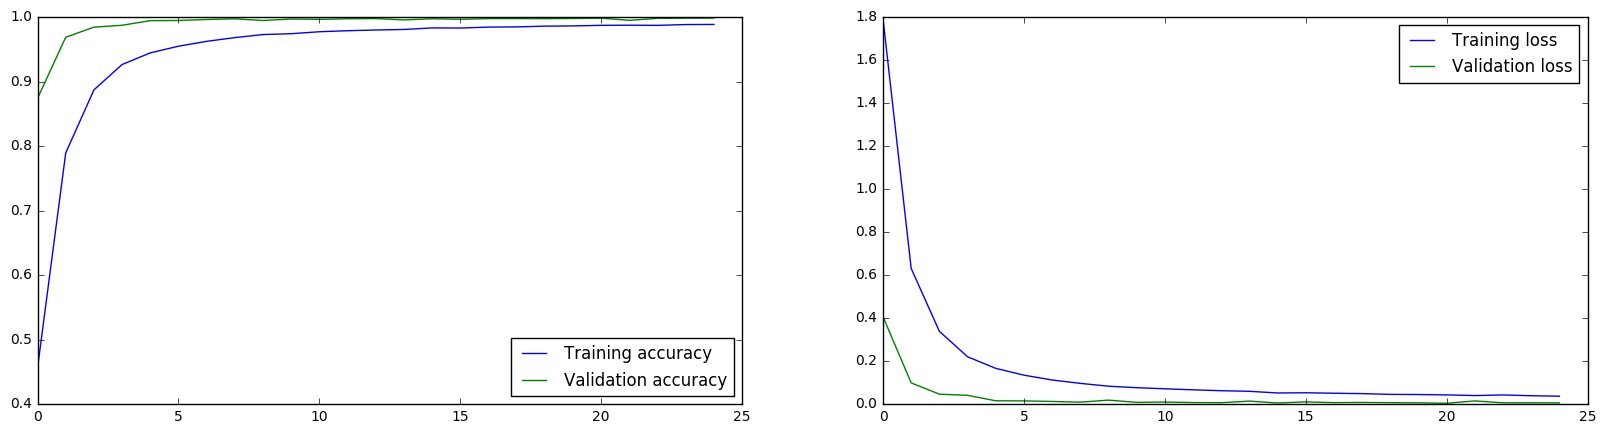

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    learning_info = []
    best_loss = 1000
    iterations_not_improved = 0
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        training_loss = 0.0
        training_accuracy = 0.0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            my_feed_dict = {x:batch_x, y:batch_y,keep_prob:0.5}
            sess.run(training_operation, feed_dict=my_feed_dict)
            accuracy, loss = sess.run((accuracy_operation, loss_operation), feed_dict=my_feed_dict)
            training_accuracy += (accuracy * len(batch_x))
            training_loss += (loss * len(batch_x))
            
        training_accuracy /= X_train.shape[0]
        training_loss /= X_train.shape[0]
        validation_accuracy, validation_loss = evaluate(X_validation, y_validation) 
        
        learning_info.append((training_accuracy, training_loss, validation_accuracy, validation_loss, LEARNING_RATE))
        learning_history = np.array(learning_info)
        
        # show some meaningful information
        if i == 0:
            print("EPOCH   Training Accuracy   Training Loss      Val. Accuracy       Val. Loss")
        print("{:3d}     {:.6f}            {:.6f}           {:.6f}            {:.6f}       ".format(i+1, training_accuracy, training_loss, validation_accuracy, validation_loss), end="")
        print()
        
        if validation_loss - best_loss < -1e-6:
            best_loss = validation_loss
            iterations_not_improved = 0
            if validation_loss < 0.25:
                print("Model saved",end="")
                saver.save(sess, save_model_in_path)
                did_save = True
        else:
            iterations_not_improved += 1
            
        if iterations_not_improved > 5:
            print("Validation loss is no longer improving, do early stopping")
            break

    
    if did_save == False:
        print("Model saved")
        saver.save(sess, save_model_in_path)
   
    plot_learning_curves(learning_history)

### Evaluate the model performance

In [17]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, save_model_in_path)
    test_accuracy,test_loss = evaluate(X_test, y_test_raw)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.966


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I trained the model using the Adam optimizer provided by Tensorflow, which is basically an advanced version of gradient descent using moving averages of the parameters, i.e., momentum (A nice comparison of optimization algorithsm can be found in [[1]](http://sebastianruder.com/optimizing-gradient-descent/))
The parameters of the training process were chosen as follows: Epochs = 25, batch size = 128, learning rate = 0.001. The parameters for the random initialization were set to mu = 0 and sigma = 0.1. Due to the long training times, I did not do extensive parameter studies.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started out with LeNet as initial desing to set up the notebook and the whole pipeline. Because the performance was not as good as I had hoped, I moved on and developed an architecture inspired by the one described in [[1]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). Also using the multi-scale approach but using larger fully connected layers with dropout for training, I obtained satisfactory results. The first layer is designed with a 1x1 filter and depth 3 to allow the network to find an optimal color space. I also tried grayscale images, but they did not work as well. Next, we have two convolutional layers with a filter size of 5 with 108 and 200 features, respectively. Each convolutional layer is followed by a maxpooling layer (2x2). As described in [[1]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), the output from the two convolutional layers is then combined, resulting in a multi-scale network.
Next, two fully connected layer with 400 units and rectified linear activation function are introduced before the final classification layer with 43 output neurons corresponding to the different traffic sign classes. A dropout layer (keepprob=0.5) is used after each of the fully connected layer increase robustness.
At the end, the outputs of the last layers are fed into a softmax function to compute the probabilities for each class. With this architecture I am able to achieve a test accuracy of 96.6%.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Belgian traffic sign data set
Import Belgian traffic sign data set (data downloaded from here (http://btsd.ethz.ch/shareddata/)) and extract one sign of each of the 62 classes using the following code.

In [18]:
import os
import skimage.data


def load_belgian_traffic_sign_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith('.ppm')]
        for f in file_names:
            img = np.array(skimage.data.imread(f))
            images.append(img)
            labels.append(int(d))
            
    return np.array(images), labels

def resize_images(images):
    result = []
    for i in range(0,images.shape[0]):
        img = np.array(images[i])      
        img = cv2.resize(img, (32,32))
        img = np.array(img).reshape(32,32,3)
        result.append(img)
    return np.array(result)


def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()
    
    
def get_one_of_each_kind(images, labels):
    unique_images = []
    unique_labels = set(labels)
    for label in unique_labels:
        # Pick the first image for each label.
        unique_images.append(images[labels.index(label)])
    return np.array(unique_images),np.array(unique_labels)




In [ ]:
#belgian_traffic_signs_raw,belgian_labels = load_belgian_traffic_sign_data('belgian_traffic_signs')
#belgian_traffic_signs= resize_images(belgian_traffic_signs_raw)
#unique_belgian_traffic_signs, unique_belgian_labels = get_one_of_each_kind(belgian_traffic_signs,belgian_labels)

### Plot the new images

In [ ]:
# this only works if the dataset is availabel
#plot_images_simple(unique_belgian_traffic_signs, unique_belgian_labels)

In [ ]:


### select seven categories, two of which are not present in the German traffic sign data set
#belgian_traffic_signs_subset = [] 
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[0,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[21,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[31,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[2,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[61,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[60,:,:,:])
#belgian_traffic_signs_subset.append(unique_belgian_traffic_signs[47,:,:,:])

# manually add labels accroding to german traffic sign data set
# last to signs do not exist in the dataset, hence label is set to arbrirary value
#belgian_traffic_signs_subset_label=np.array([22,14,9,23,12,49,49])

#output = open('my_belgian_signs.p', 'wb')
#pickle.dump(belgian_traffic_signs_subset, output)
#output.close()

#output = open('my_belgian_signs_labels.p', 'wb')
#pickle.dump(belgian_traffic_signs_subset_label, output)
#output.close()
    

In [19]:
## load a small subset of the data only (do avoid having to submit the full dataset)

with open('my_belgian_signs.p', mode='rb') as f:
    belgian_traffic_signs_subset = pickle.load(f)

with open('my_belgian_signs_labels.p', mode='rb') as f:
    belgian_traffic_signs_subset_label = pickle.load(f)

### Preprocess new images

In [20]:
# Preprocess images 
X_additional = preprocess_all_images_v2(np.array(belgian_traffic_signs_subset))
y_additional = belgian_traffic_signs_subset_label

# add subset of old images for testing for now
#X_additional = X_train[0:50]
#y_additional = y_train[0:50]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I choose to import images from a different traffic sign dataset, namely the "Belgian Traffic Sign Dataset" which can be found here [[2]](http://btsd.ethz.ch/shareddata/). This dataset contains more types of sign not part in the german traffic sign dataset. Obviously, the developed machine learning pipeline will not be able to classify those signs correctly. However, it will be interesting to see how the learning algorithm behaves.
In addition, some signs have a slightly different style, e.g., the no passing sign, and should thus be harder to classify. 

In [21]:
softmax_op = tf.nn.softmax(logits)
top_k_op = tf.nn.top_k(softmax_op, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, save_model_in_path)
    add_accuracy,_ = evaluate(X_additional, y_additional)
    feed_dict = {x: X_additional, y: y_additional,keep_prob:1.0}
    ((top_values, top_indices), probabilities) = sess.run([top_k_op,softmax_op], feed_dict=feed_dict)
    
    print("Accuracy for the additional images is: {:.4f}".format(add_accuracy))

    predicted_classes = probabilities.argmax(axis=1)
    false_classified_indices = np.where(predicted_classes != y_additional)

Accuracy for the additional images is: 0.7143


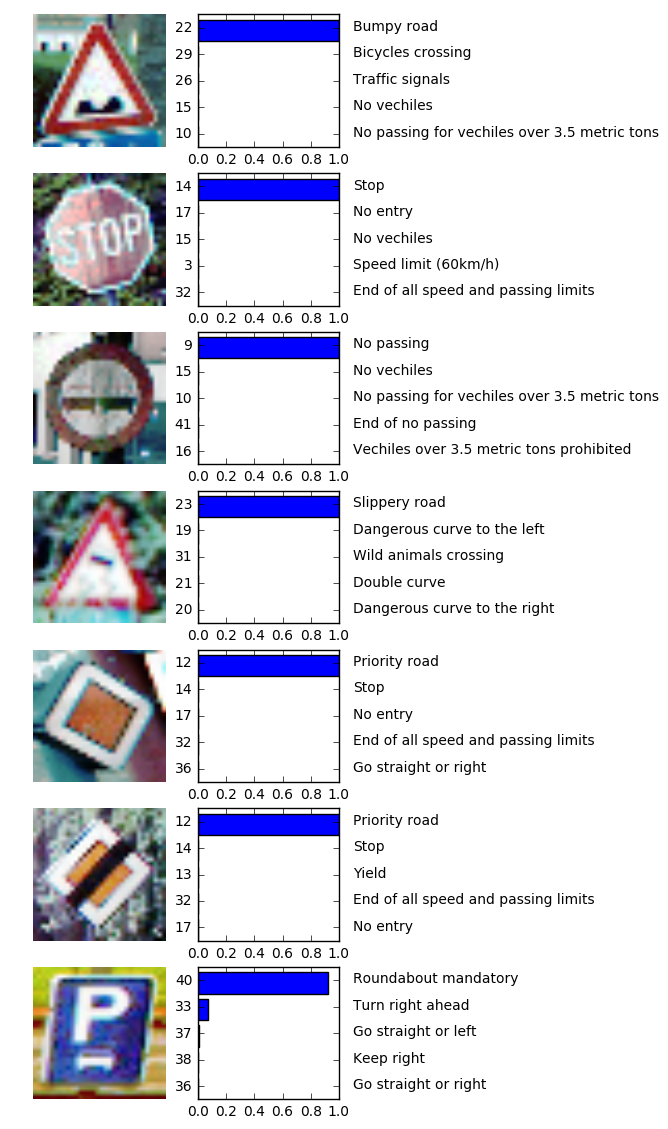

In [22]:
fig = plt.gcf()
def plot_top_results(i, data, top_indices, top_values, num_cols=2):
    n = int(data.shape[0])
    num_rows = n
    row = i
    ax1 = plt.subplot2grid((num_rows,num_cols),(row, 0))
    ax2 = plt.subplot2grid((num_rows,num_cols),(row, 1)) 
    img = data[i,:,:,:]
    ax1.axis('off')
    # workaround for single channel grayscale images
    if img.shape[2]==1:
        ax1.imshow(np.concatenate((img,img,img), axis=2),cmap = 'gray')
    else:
         ax1.imshow(img)
    ind = np.arange(5)
    ax2.barh(ind[::-1],top_values[i,:])
    ax2.set_autoscalex_on(False)
    ax2.set_xlim([0,1.000])
    ax2.set_yticks(ind + 0.5)
    ax2.set_yticklabels(map(lambda x: str(x), reversed(top_indices[i,:])))

    for j in range(5):
        index = top_indices[i,4-j]
        ax2.text(1.1, j + 0.4, signnames[index])
        
num_cols = 2
num_rows = 7
plt.figure(figsize=(4,2 * num_rows))

for i in range(7):
    plot_top_results(i, X_additional[0:7], top_indices[0:7], top_values[0:7])
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Correctly classifies roughly 70% of of the new test images which is significantly worse compared to the perfomance on the test set. Both missclassified signs do not belong to any class present in the training set. Thus their missclassification is no suprise. All other five images are correctly classified.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

The model correctly classifies all of the first five sign with high certainty. Oddly, it also shows high certainty for the two missclassified images. For the first image, this is not suprising because it is very similar to the image "Priority Road". The certainty with which the last image is classified as "Roundabout mandatory" is suprising to me.

### Conclusion
It took me quite some time to ge the hang of tensorflow and running this notebook on AWS. Training on my Mac is pretty much impossible since training on g2.2xl large already takes a significant amount of time, i.e. roughly 45 min to an hour. This makes parameter studies by trial and error somewhat cumbersome  and timeconsuming. I have to admit that i am not quite satisfied with the accuracy of the classifier and had hoped to to achieve something above 98.5 or so. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.